In [101]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns',100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score



In [102]:
df = pd.read_excel('IFD.xlsx')

In [103]:
df.shape

(1000, 40)

In [104]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital_gains                           int64
capital_loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [105]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [106]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


## Data Cleaning:

In [107]:
stats = []

for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df.sort_values('percent_missing', ascending=False)

,feature,unique_values,percent_missing,percent_biggest_cat,type
39,_c39,0,100.0,100.0,float64
1,age,46,0.0,4.9,int64
22,incident_state,7,0.0,26.2,object
23,incident_city,7,0.0,15.7,object
24,incident_location,1000,0.0,0.1,object
25,incident_hour_of_the_day,24,0.0,5.4,int64
26,number_of_vehicles_involved,4,0.0,58.1,int64
27,property_damage,3,0.0,36.0,object
28,bodily_injuries,3,0.0,34.0,int64
29,witnesses,4,0.0,25.8,int64


In [108]:
#extract out the year as 

df['policy_bind_year']= pd.DatetimeIndex(df['policy_bind_date']).year


In [109]:
#extract the month out 
#all accidents are from 2015 jan and feb, so year isnt very important

df['incident_month']= pd.DatetimeIndex(df['incident_date']).month


In [110]:
#replace "?" with undocumented 

df['collision_type'] = df['collision_type'].replace("?", "undocumented")
df['police_report_available'] = df['police_report_available'].replace("?", "undocumented")
df['property_damage'] = df['property_damage'].replace("?", "undocumented")
df['auto_make'] = df['auto_make'].replace("Suburu", "Subaru")

In [111]:
#incident_severity can be seen as ordinal
#code them in order of severity 

df['incident_severity'] = df['incident_severity'].map({"Trivial Damage":0,
                                                       "Minor Damage":1,
                                                       "Major Damage":2,
                                                       "Total Loss":3
                                                      }).astype("int32")
df.incident_severity.value_counts()

1    354
3    280
2    276
0     90
Name: incident_severity, dtype: int64

In [112]:
#umbrella limit is like an insruance topup that pays your liabilities in case you get sued
#cannot be zero
#this 0 is an error

df['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
         ...   
657     9000000
458     9000000
975     9000000
430    10000000
115    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [113]:
#edit to positve
df['umbrella_limit'].iloc[290] = 1000000

In [114]:
#check
df['umbrella_limit'].iloc[290]

1000000

In [115]:
#check
df['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
         ...   
700     9000000
88      9000000
975     9000000
115    10000000
430    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [116]:
#continuous variables

cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital_gains','capital_loss', 
           'auto_year','witnesses','bodily_injuries','policy_bind_year','incident_severity']

In [117]:
#ordinal variables

ord_var = ['policy_deductable','witnesses','bodily_injuries','incident_severity']

In [118]:
#nominal variables

nom_var = ['incident_date',
 'police_report_available',
 'incident_city',
 'property_damage',
 'policy_csl',
 'insured_occupation',
 'collision_type',
 'incident_type',
 'incident_location',
 'fraud_reported',
 'incident_month',
 'insured_education_level',
 'auto_model',
 'incident_state',
 'policy_bind_date',
 'policy_number',
 'insured_zip',
 'insured_hobbies',
 'insured_sex',
 'insured_relationship',
 'auto_make',
 'policy_state',
 'authorities_contacted']

In [119]:
#check for norminal data with very large number of categories

for col in nom_var:
    print("###", col, "###" )
    print("  ")
    print(df[col].value_counts())
    print("---------------------------------------------")
    print("  ")

### incident_date ###
  
2015-02-02    28
2015-02-17    26
2015-01-07    25
2015-02-04    24
2015-01-10    24
2015-01-24    24
2015-01-19    23
2015-01-08    22
2015-01-30    21
2015-01-13    21
2015-01-31    20
2015-02-06    20
2015-02-22    20
2015-02-12    20
2015-02-21    19
2015-01-01    19
2015-01-12    19
2015-01-14    19
2015-02-23    19
2015-01-21    19
2015-01-20    18
2015-02-01    18
2015-02-14    18
2015-02-25    18
2015-01-18    18
2015-01-03    18
2015-02-28    18
2015-02-08    17
2015-01-09    17
2015-01-06    17
2015-02-24    17
2015-02-26    17
2015-02-05    16
2015-02-13    16
2015-02-16    16
2015-01-16    16
2015-02-15    16
2015-01-15    15
2015-02-18    15
2015-01-17    15
2015-01-28    15
2015-02-20    14
2015-01-22    14
2015-02-27    14
2015-01-27    13
2015-02-03    13
2015-02-09    13
2015-01-23    13
2015-01-04    12
2015-03-01    12
2015-01-26    11
2015-01-29    11
2015-01-02    11
2015-02-10    10
2015-01-25    10
2015-02-11    10
2015-02-19    10
2015-0

In [120]:
large_cat = []

for col in nom_var:
    if df[col].nunique() > 20:
        large_cat.append(col)
        print(col, df[col].nunique())
    else: 
        pass
    
#incident location, insured zip, policy bind date, policy number too many unique to be meaningful

incident_date 60
incident_location 1000
auto_model 39
policy_bind_date 951
policy_number 1000
insured_zip 995


In [121]:
#get a data frame with var that have large num categories
#only auto model 
large_dummy = pd.get_dummies(df[['auto_model','incident_date']], drop_first=True)

#put in the DV
large_dummy['fraud_reported']=df['fraud_reported']

#numerical code the DV
large_dummy['fraud_reported'] = large_dummy['fraud_reported'].map({"Y":1,"N":0})

#unique to each case. wont be useful
large_dummy.head(10)

,incident_date,auto_model_95,auto_model_3 Series,auto_model_92x,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported
0,2015-01-25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2015-01-21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-02-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2015-01-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2015-02-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,2015-01-02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2015-01-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,2015-02-27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2015-01-30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2015-01-05,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
#Color negative numbers red, positive blue
def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = large_dummy.corr()
corr.style.applymap(color)


#no correlation with (model) and fraud. drop var

,auto_model_95,auto_model_3 Series,auto_model_92x,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported
auto_model_95,1.000000,-0.022553,-0.028273,-0.032652,-0.030287,-0.019118,-0.022553,-0.023797,-0.028273,-0.024984,-0.023797,-0.027749,-0.026122,-0.027749,-0.028273,-0.024397,-0.026674,-0.024984,-0.023797,-0.031725,-0.030287,-0.020557,-0.032191,-0.023797,-0.029295,-0.026122,-0.032652,-0.030773,-0.029795,-0.035310,-0.018359,-0.024984,-0.023797,-0.026122,-0.025559,-0.034879,-0.025559,-0.021242,-0.023877
auto_model_3 Series,-0.022553,1.000000,-0.022979,-0.026538,-0.024616,-0.015538,-0.018330,-0.019341,-0.022979,-0.020306,-0.019341,-0.022553,-0.021231,-0.022553,-0.022979,-0.019829,-0.021679,-0.020306,-0.019341,-0.025784,-0.024616,-0.016707,-0.026163,-0.019341,-0.023810,-0.021231,-0.026538,-0.025011,-0.024216,-0.028698,-0.014921,-0.020306,-0.019341,-0.021231,-0.020773,-0.028348,-0.020773,-0.017264,-0.060100
auto_model_92x,-0.028273,-0.022979,1.000000,-0.033269,-0.030859,-0.019479,-0.022979,-0.024246,-0.028807,-0.025456,-0.024246,-0.028273,-0.026615,-0.028273,-0.028807,-0.024858,-0.027178,-0.025456,-0.024246,-0.032323,-0.030859,-0.020945,-0.032799,-0.024246,-0.029848,-0.026615,-0.033269,-0.031354,-0.030357,-0.035977,-0.018705,-0.025456,-0.024246,-0.026615,-0.026041,-0.035538,-0.026041,-0.021643,0.015236
auto_model_A3,-0.032652,-0.026538,-0.033269,1.000000,-0.035639,-0.022496,-0.026538,-0.028002,-0.033269,-0.029399,-0.028002,-0.032652,-0.030737,-0.032652,-0.033269,-0.028708,-0.031387,-0.029399,-0.028002,-0.037330,-0.035639,-0.024189,-0.037879,-0.028002,-0.034472,-0.030737,-0.038422,-0.036210,-0.035060,-0.041550,-0.021602,-0.029399,-0.028002,-0.030737,-0.030075,-0.041042,-0.030075,-0.024995,0.010577
auto_model_A5,-0.030287,-0.024616,-0.030859,-0.035639,1.000000,-0.020867,-0.024616,-0.025974,-0.030859,-0.027270,-0.025974,-0.030287,-0.028511,-0.030287,-0.030859,-0.026629,-0.029114,-0.027270,-0.025974,-0.034626,-0.033058,-0.022437,-0.035136,-0.025974,-0.031975,-0.028511,-0.035639,-0.033588,-0.032520,-0.038540,-0.020038,-0.027270,-0.025974,-0.028511,-0.027897,-0.038070,-0.027897,-0.023185,0.040789
auto_model_Accord,-0.019118,-0.015538,-0.019479,-0.022496,-0.020867,1.000000,-0.015538,-0.016395,-0.019479,-0.017213,-0.016395,-0.019118,-0.017997,-0.019118,-0.019479,-0.016809,-0.018377,-0.017213,-0.016395,-0.021857,-0.020867,-0.014163,-0.022178,-0.016395,-0.020183,-0.017997,-0.022496,-0.021201,-0.020527,-0.024327,-0.012648,-0.017213,-0.016395,-0.017997,-0.017609,-0.024030,-0.017609,-0.014634,-0.004319
auto_model_C300,-0.022553,-0.018330,-0.022979,-0.026538,-0.024616,-0.015538,1.000000,-0.019341,-0.022979,-0.020306,-0.019341,-0.022553,-0.021231,-0.022553,-0.022979,-0.019829,-0.021679,-0.020306,-0.019341,-0.025784,-0.024616,-0.016707,-0.026163,-0.019341,-0.023810,-0.021231,-0.026538,-0.025011,-0.024216,-0.028698,-0.014921,-0.020306,-0.019341,-0.021231,-0.020773,-0.028348,-0.020773,-0.017264,0.044543
auto_model_CRV,-0.023797,-0.019341,-0.024246,-0.028002,-0.025974,-0.016395,-0.019341,1.000000,-0.024246,-0.021426,-0.020408,-0.023797,-0.022402,-0.023797,-0.024246,-0.020923,-0.022875,-0.021426,-0.020408,-0.027206,-0.025974,-0.017629,-0.027607,-0.020408,-0.025123,-0.022402,-0.028002,-0.026390,-0.025552,-0.030282,-0.015744,-0.021426,-0.020408,-0.022402,-0.021919,-0.029912,-0.021919,-0.018216,-0.032131
auto_model_Camry,-0.028273,-0.022979,-0.028807,-0.033269,-0.030859,-0.019479,-0.022979,-0.0242

In [123]:
#drop these variables from analysis 

df.drop(large_cat, axis=1, inplace=True)

In [124]:
#redefine the norminal var
#remove dv from the list

nom_var.remove('fraud_reported')
nom_var = (list(set(nom_var) - set(large_cat))) 

## Exploratory Data Analysis:

### Dependant variable:

In [125]:
#count each level of the Dv

df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

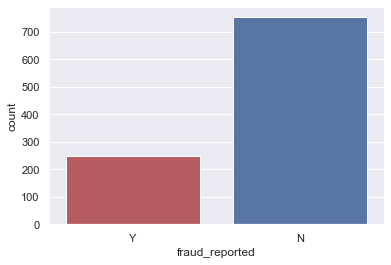

In [126]:
sns.set()

sns.countplot(x ="fraud_reported", data=df, palette=['r','b']);

### Correlations among variables:

In [127]:
#Color negative numbers red

def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = df[cont_var].corr()
corr.style.applymap(color)

,age,incident_hour_of_the_day,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim,vehicle_claim,months_as_customer,policy_annual_premium,policy_deductable,umbrella_limit,capital_gains,capital_loss,auto_year,witnesses,bodily_injuries,policy_bind_year,incident_severity
age,1.000000,0.087161,0.022102,0.069863,0.075522,0.060898,0.062588,0.922098,0.014404,0.029188,0.018425,-0.007075,0.007368,0.001354,0.052359,-0.015679,-0.037444,0.009513
incident_hour_of_the_day,0.087161,1.000000,0.120794,0.217702,0.165768,0.179536,0.215626,0.070639,-0.001578,0.060935,-0.023097,-0.016406,-0.025054,0.021368,0.006527,-0.034563,0.035412,0.188339
number_of_vehicles_involved,0.022102,0.120794,1.000000,0.274278,0.224650,0.219084,0.269393,0.014736,-0.045991,0.051214,-0.021997,0.061643,-0.014895,0.034554,-0.014669,0.014030,0.026595,0.237425
total_claim_amount,0.069863,0.217702,0.274278,1.000000,0.805025,0.810686,0.982773,0.062108,0.009094,0.022839,-0.038994,0.015980,-0.036060,-0.035781,-0.011114,0.047093,-0.000146,0.495676
injury_claim,0.075522,0.165768,0.224650,0.805025,1.000000,0.563866,0.722878,0.065329,-0.017633,0.039107,-0.045229,0.025934,-0.046060,-0.013718,-0.024843,0.047319,0.002529,0.361477
property_claim,0.060898,0.179536,0.219084,0.810686,0.563866,1.000000,0.732090,0.034940,-0.011654,0.064792,-0.022044,-0.000779,-0.022863,-0.014508,0.052640,0.039749,-0.000970,0.384283
vehicle_claim,0.062588,0.215626,0.269393,0.982773,0.722878,0.732090,1.000000,0.061013,0.020246,0.005269,-0.037190,0.015836,-0.032665,-0.042768,-0.022564,0.043449,-0.000610,0.501328
months_as_customer,0.922098,0.070639,0.014736,0.062108,0.065329,0.034940,0.061013,1.000000,0.005018,0.026807,0.016111,0.006399,0.020209,-0.000292,0.058383,-0.010162,-0.048276,0.003005
policy_annual_premium,0.014404,-0.001578,-0.045991,0.009094,-0.017633,-0.011654,0.020246,0.005018,1.000000,-0.003245,-0.005956,-0.013738,0.023547,-0.049226,0.002332,0.026780,0.001249,0.020233
policy_deductable,0.029188,0.060935,0.051214,0.022839,0.039107,0.064792,0.005269,0.026807,-0.003245,1.000000,0.009968,0.035212,-0.023544,0.026105,0.066639,-0.022765,-0.049598,0.012795


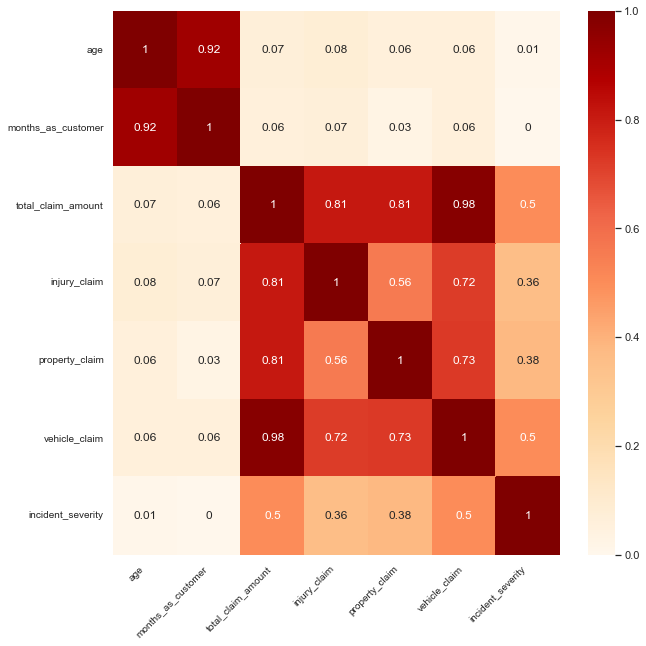

In [128]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=['age','months_as_customer','total_claim_amount',
           'injury_claim', 'property_claim','vehicle_claim',
           'incident_severity','fraud_reported']
#,'tclaim_severity_int','iclaim_severity_int','vclaim_severity_int','pclaim_severity_int'
corr_df = df[corr_list]
corr=round(corr_df.corr(),2)

# Set the default matplotlib figure size

fix, ax = plt.subplots(figsize=(10,10))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, ax=ax, annot=True, cmap='OrRd')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## Numeric features:

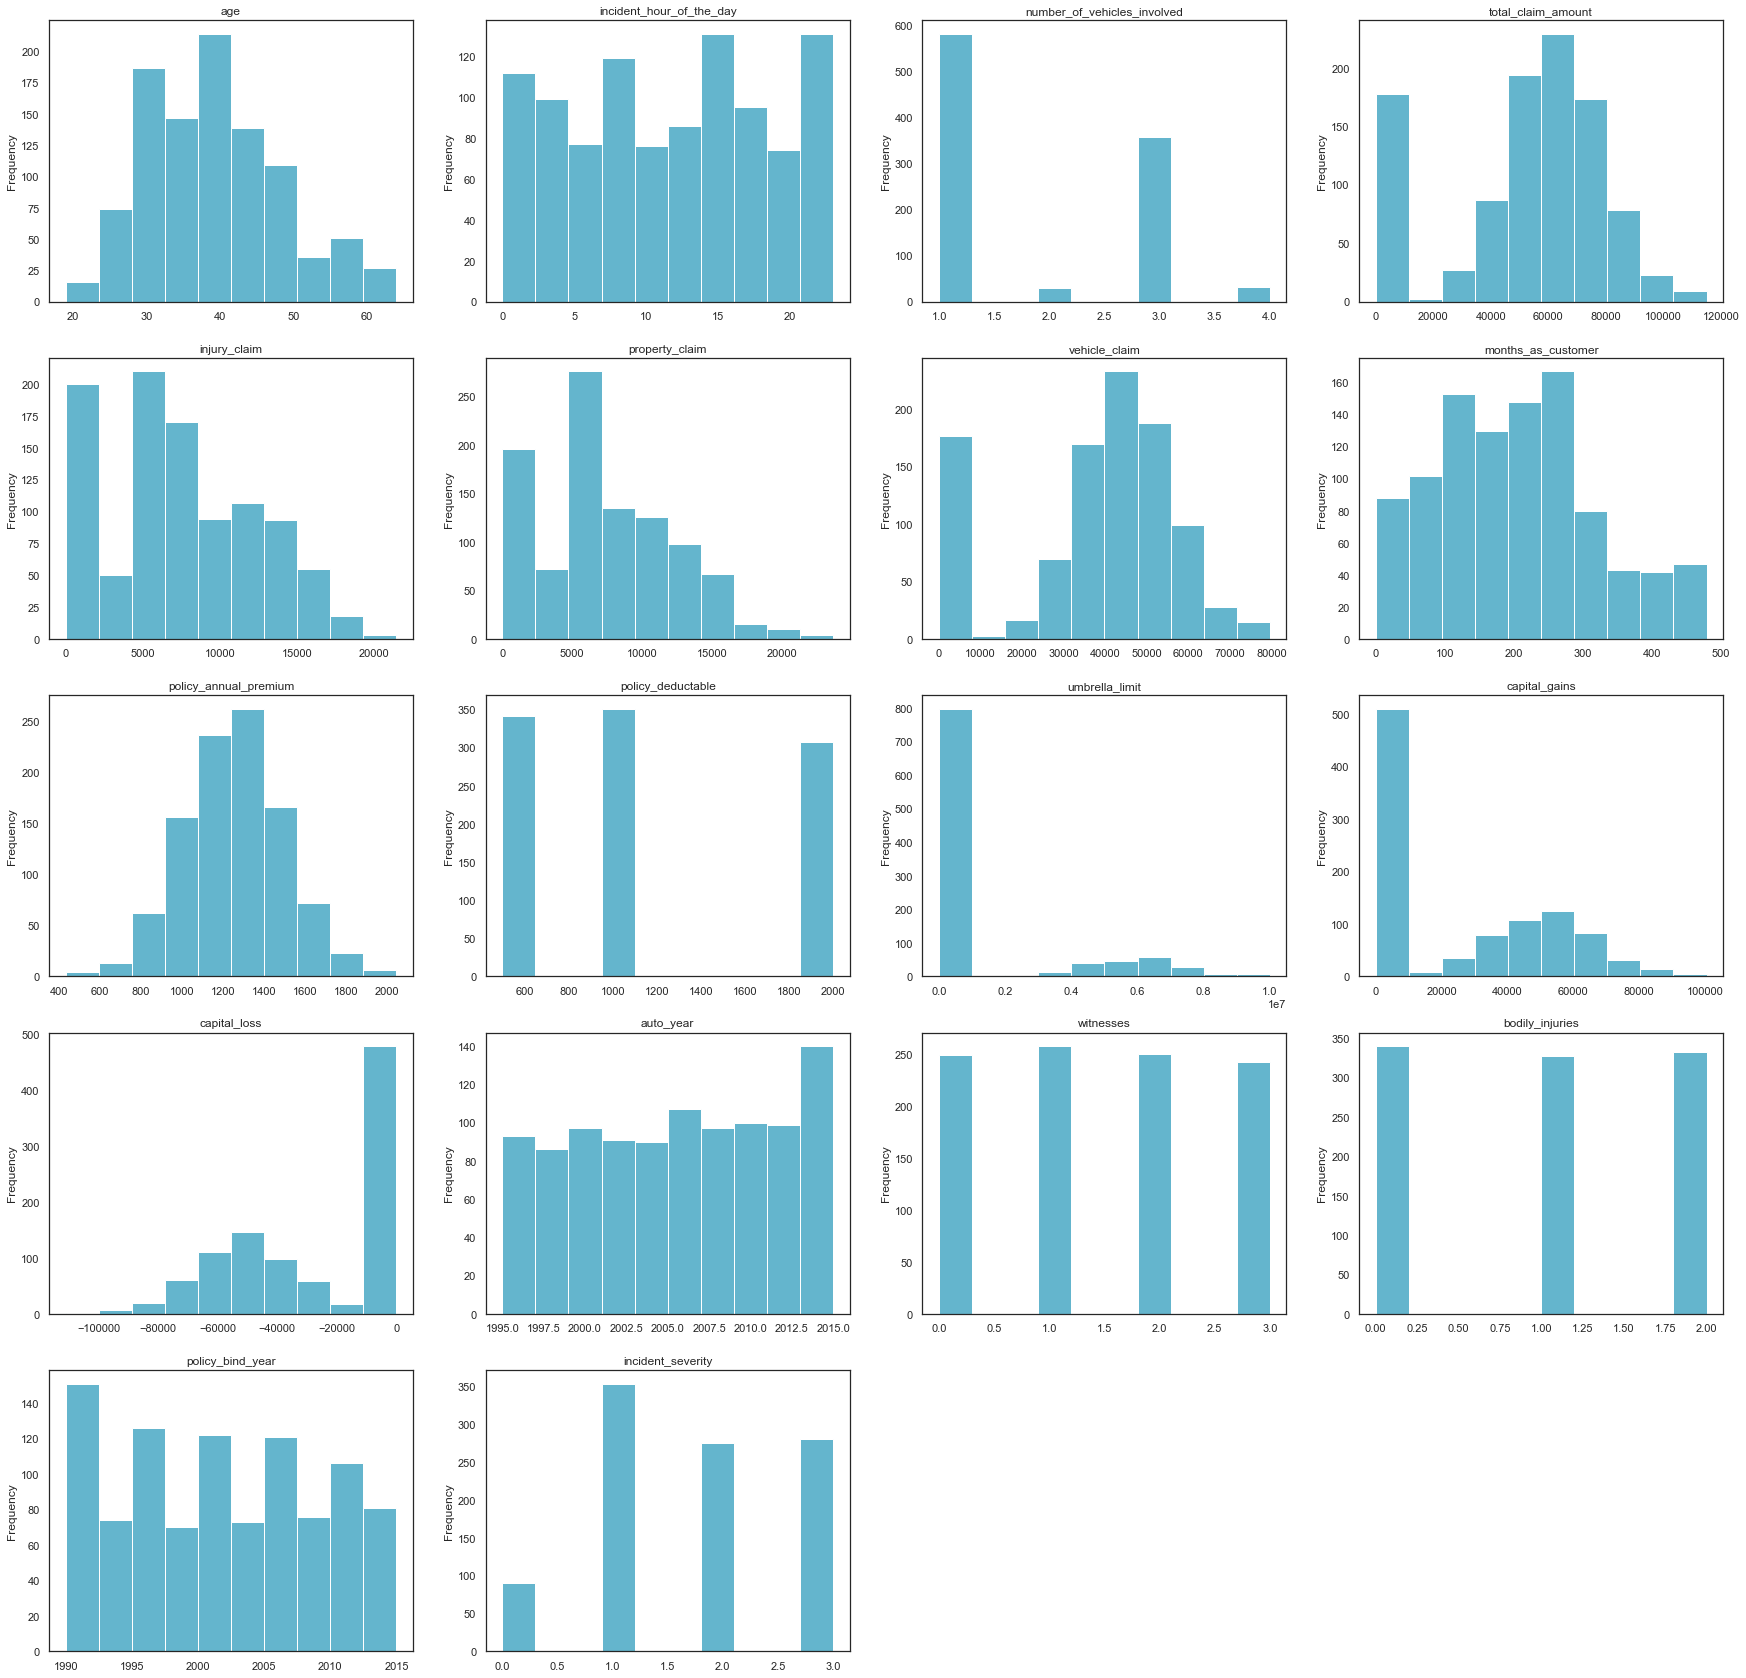

In [129]:
#df.hist(figsize=(20,20))
#plt.show()
count=1
fig = plt.subplots(figsize=(30, 30))
                   
for i, name in enumerate(df[cont_var]):
    plt.subplot(5, 4, count)
    df[name].plot(kind="hist", color="c", title=name)
    count+=1
plt.show()

## Categorical features:

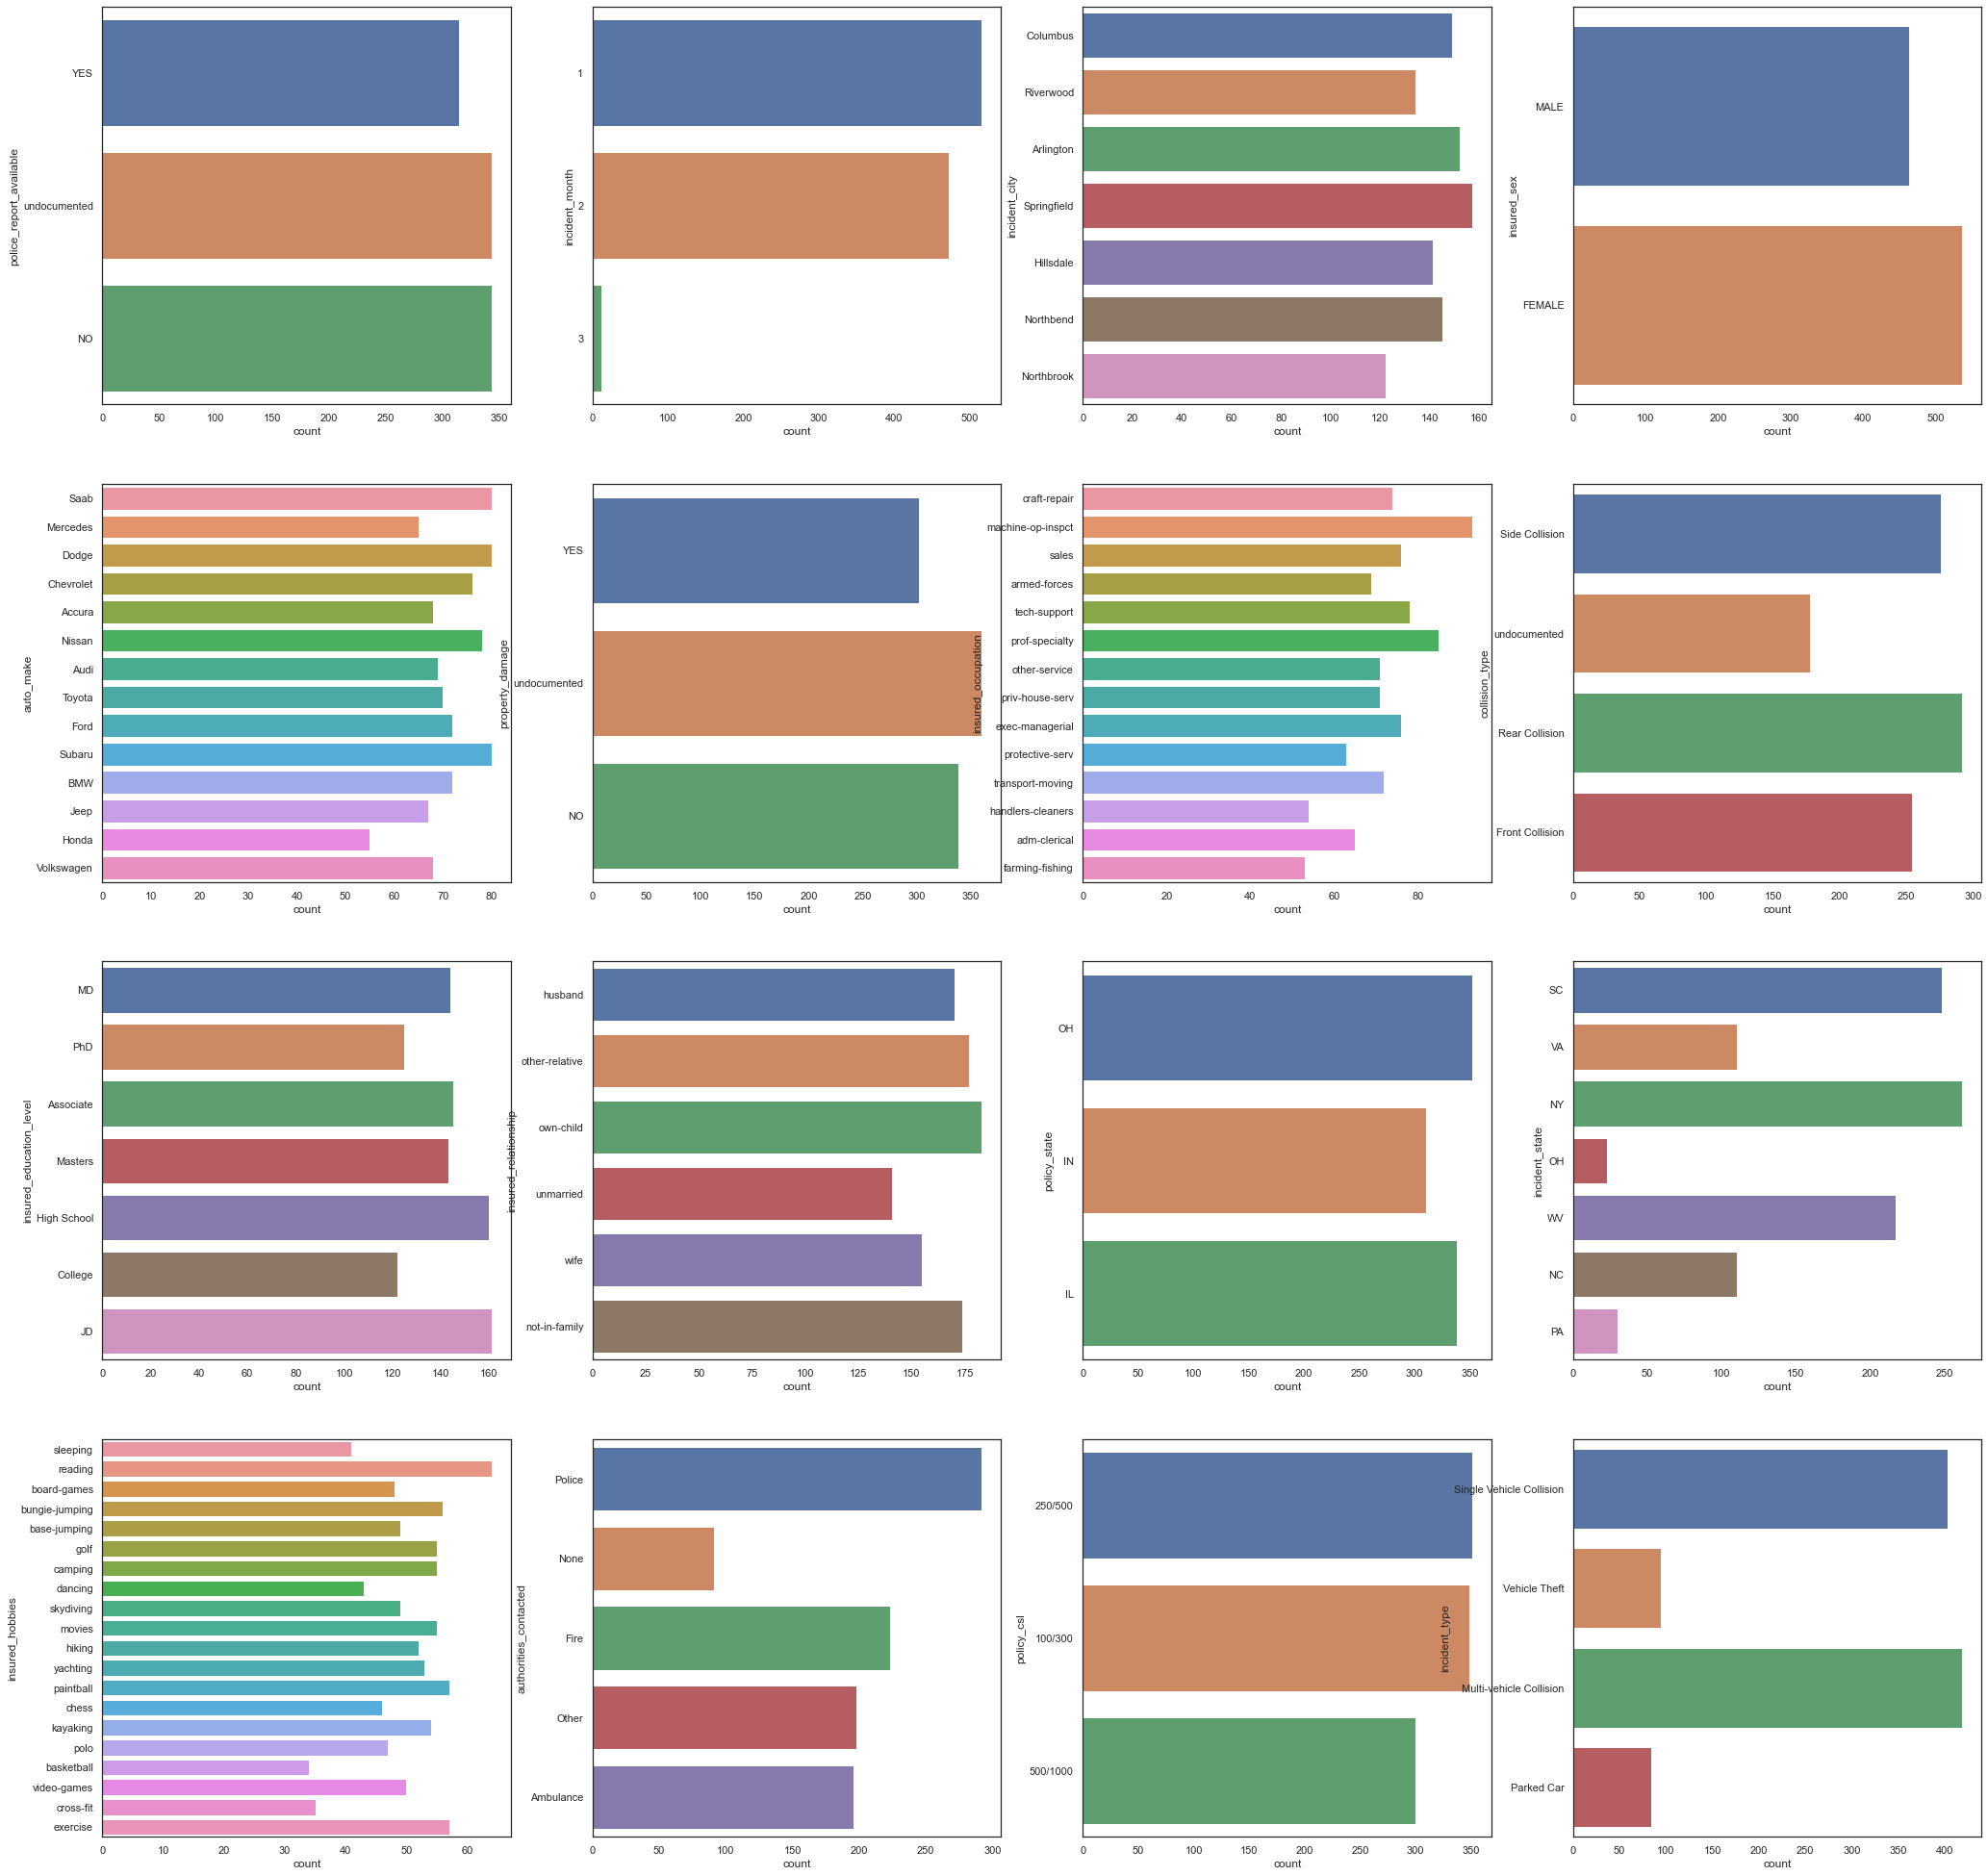

In [130]:
count=1
fig = plt.subplots(figsize=(35, 35))
                   
for i, name in enumerate(df[nom_var]):
    plt.subplot(4, 4, count)
    sns.countplot(y=name, data=df)
    count+=1
plt.show()


## Visualizing variables against the DV:

### Categorical variables:

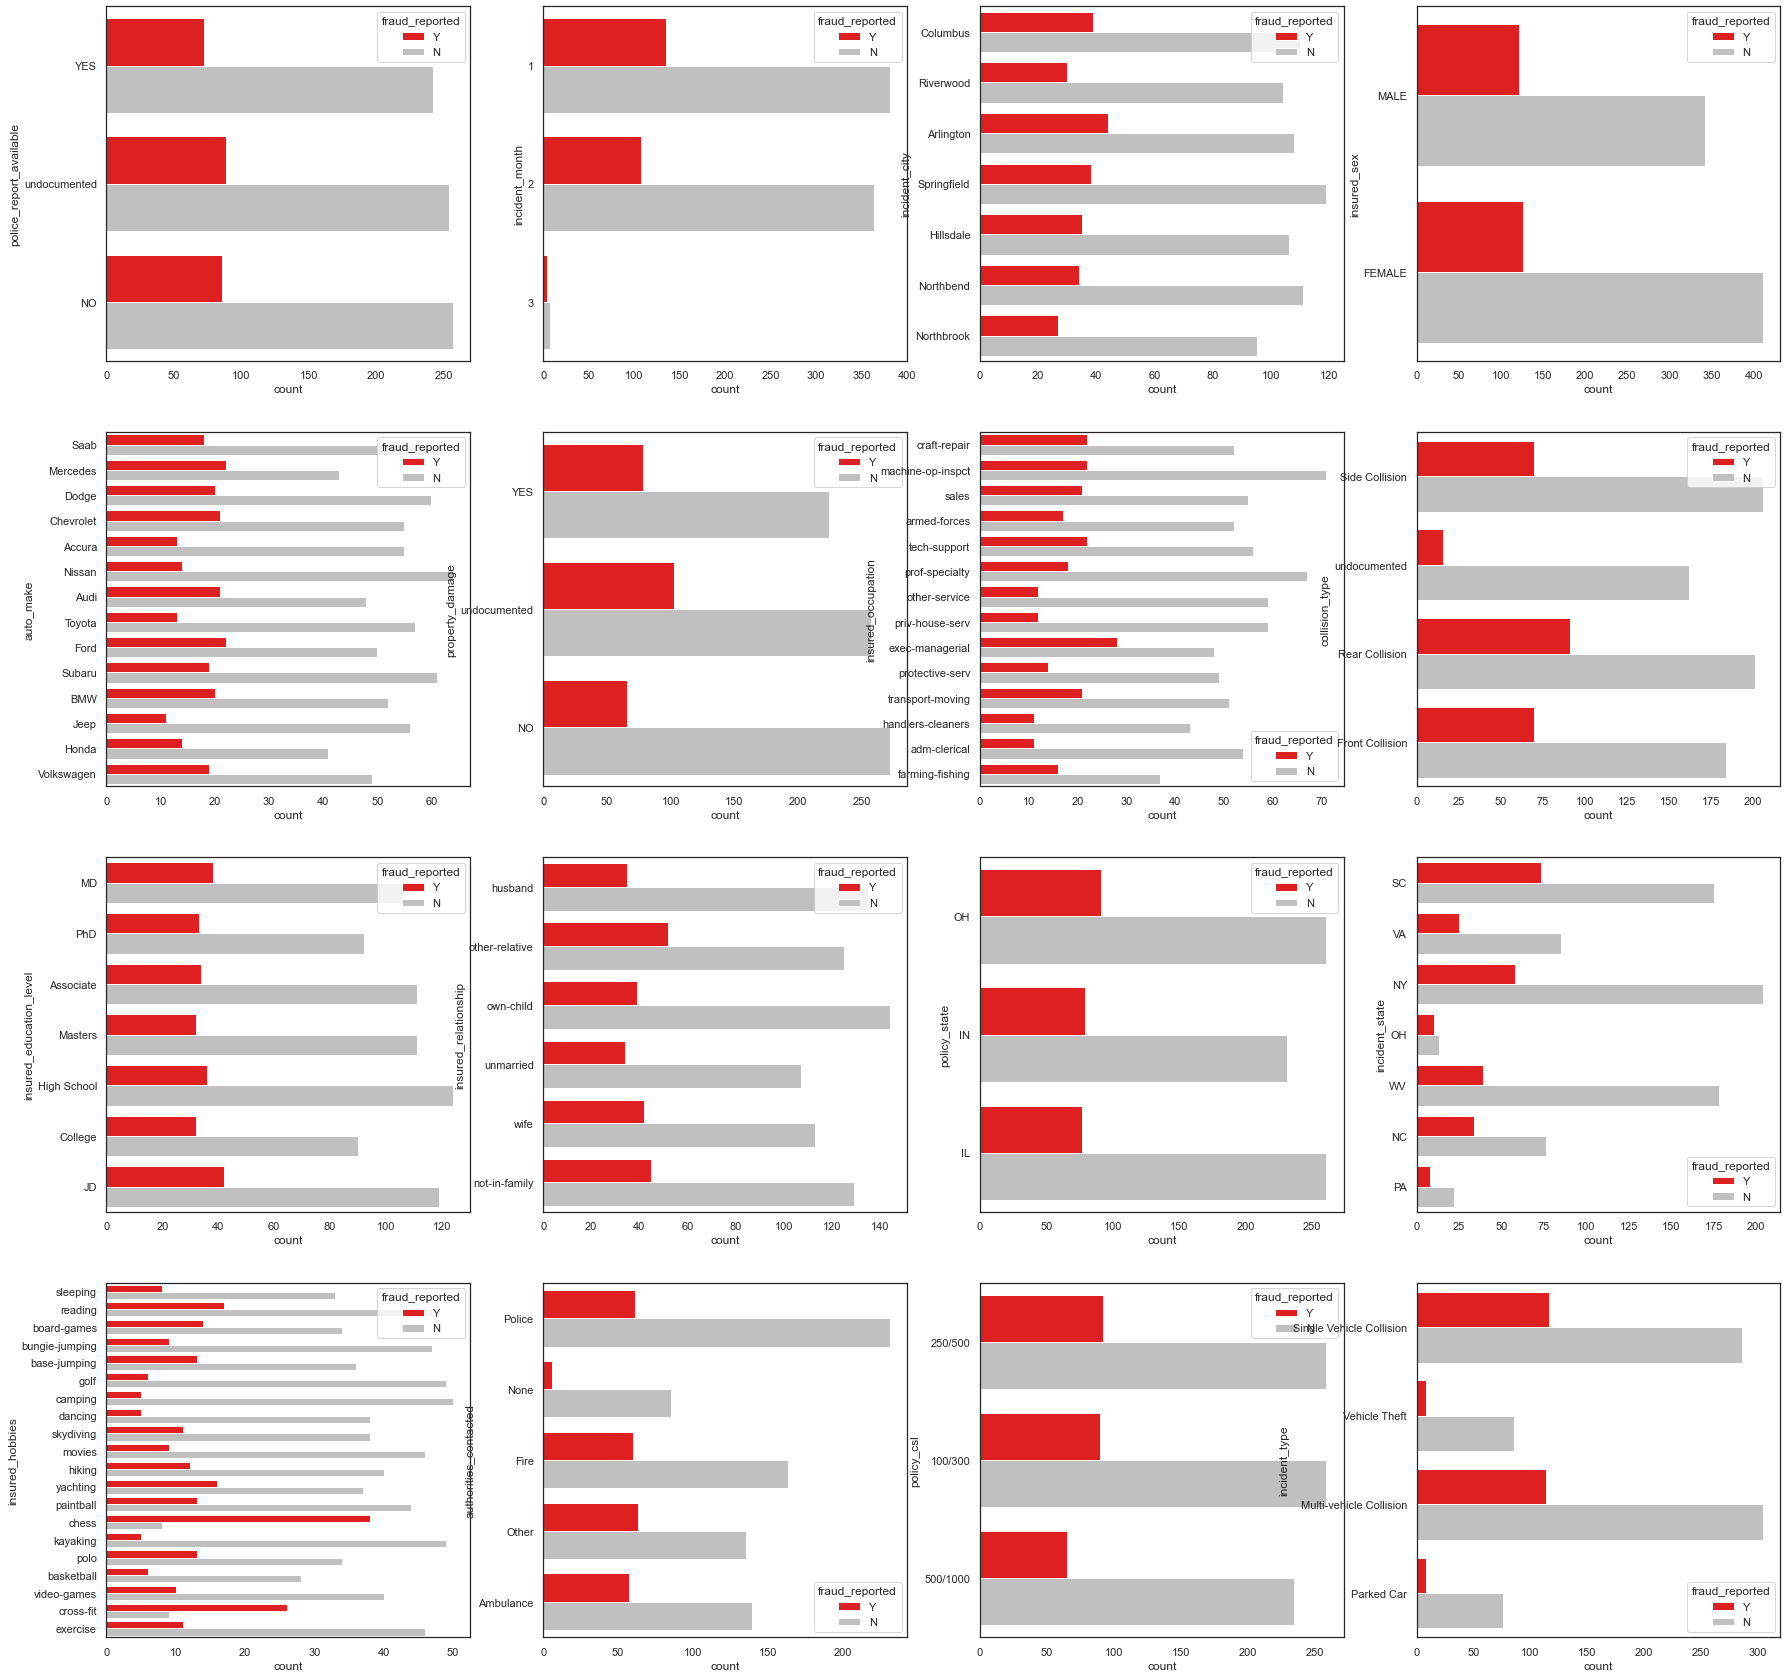

In [131]:
count=1
fig = plt.subplots(figsize=(30, 30))
                   
for i, name in enumerate(df[nom_var]):
    plt.subplot(4, 4, count)
    sns.countplot(y=name, data=df, hue="fraud_reported", palette=['red','silver'])
    count+=1
plt.show()

### Numeric variables:

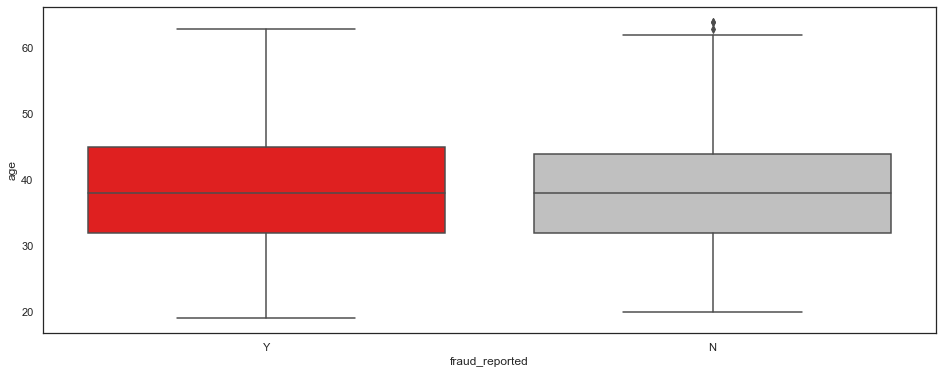

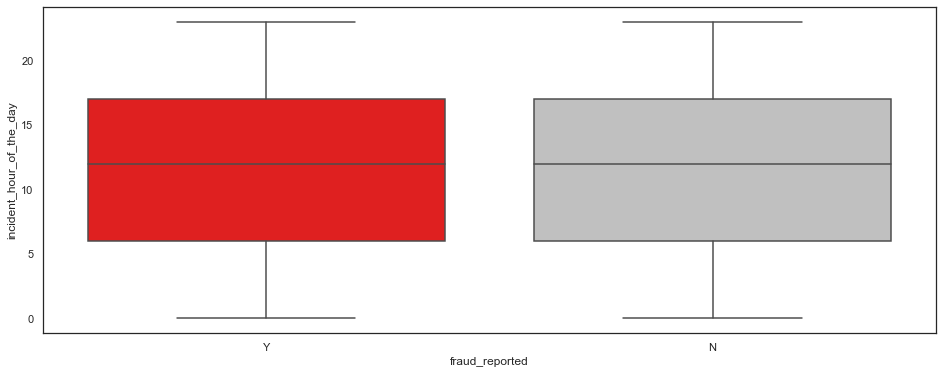

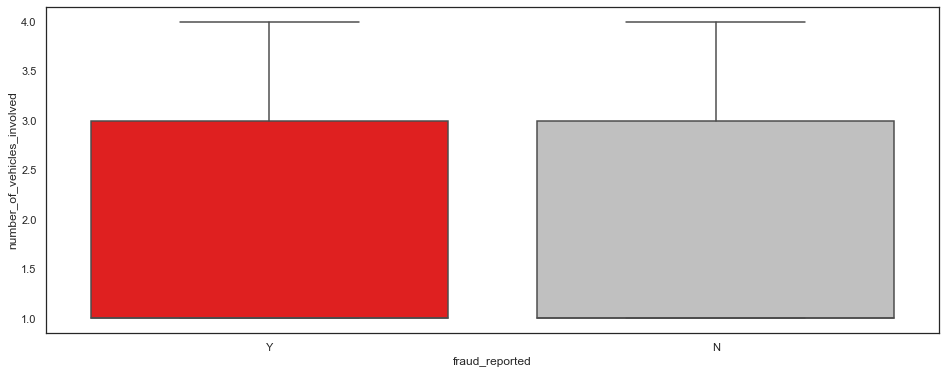

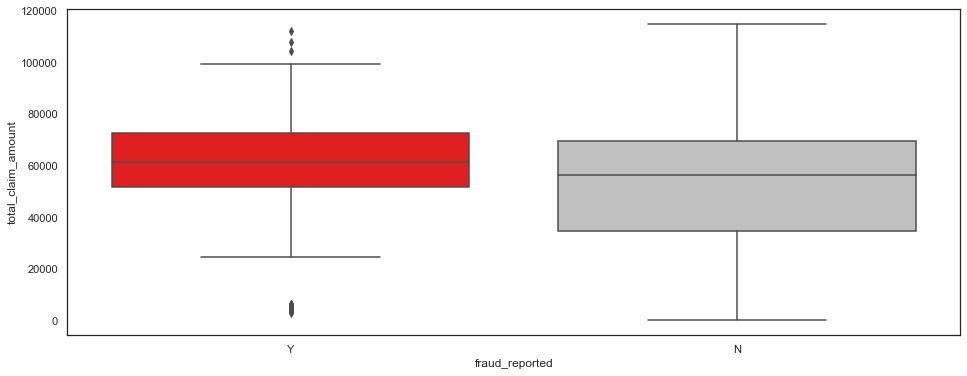

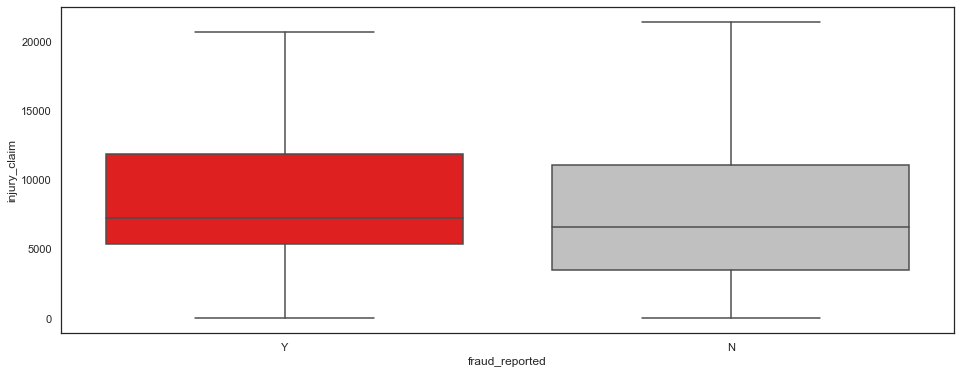

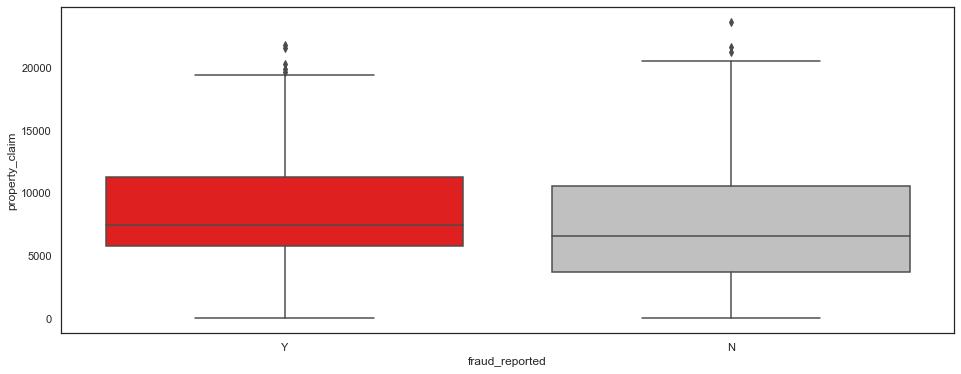

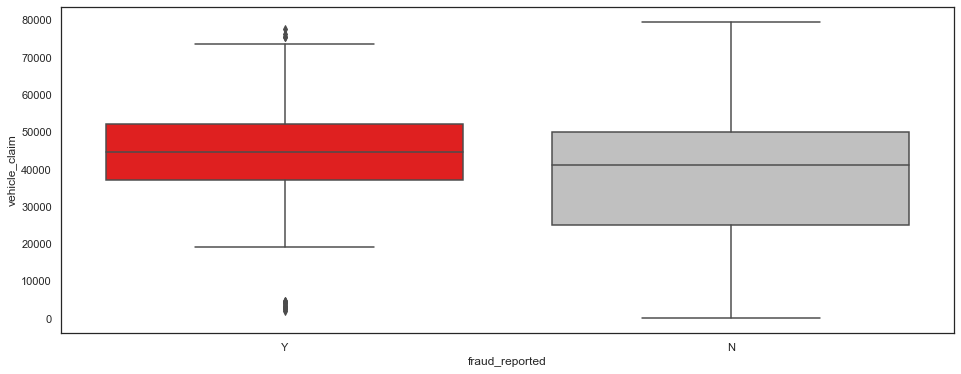

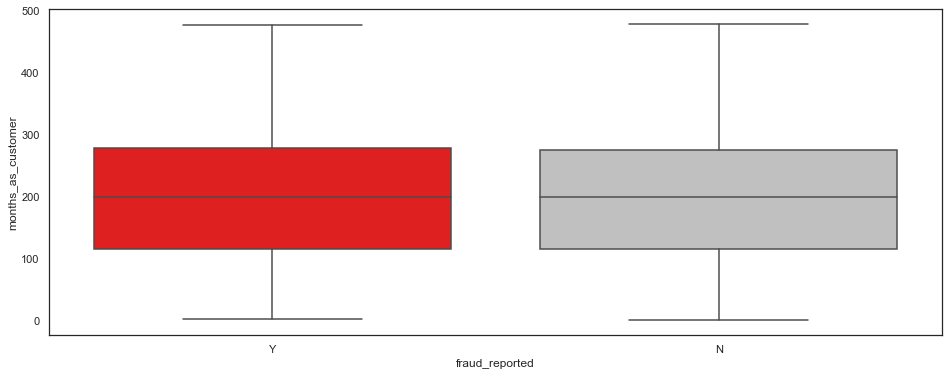

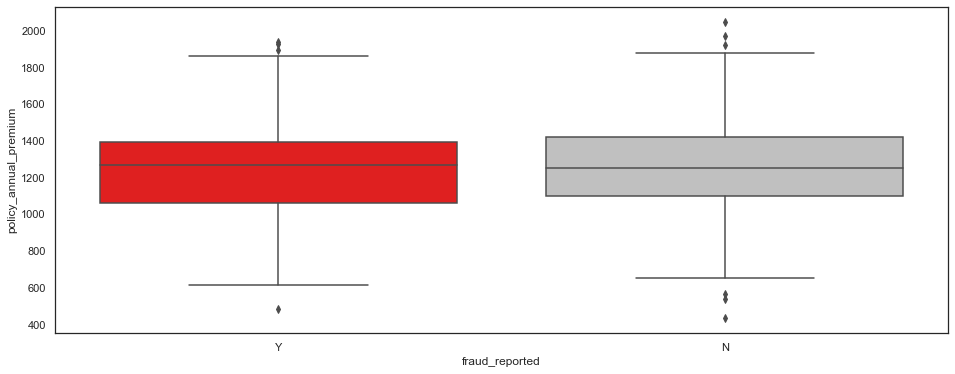

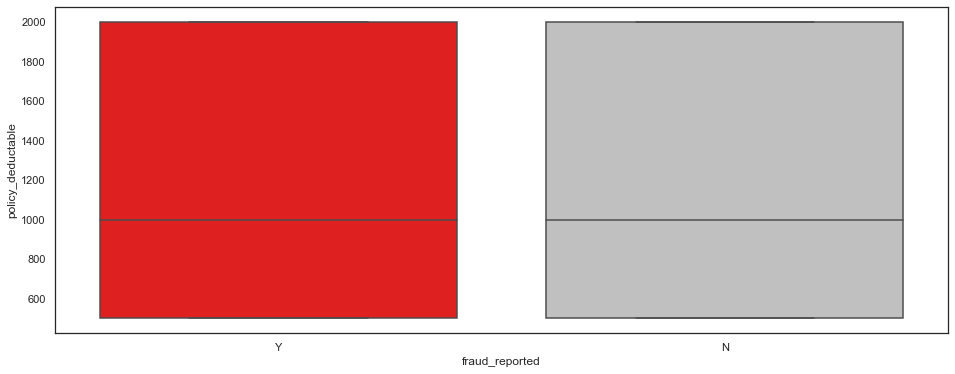

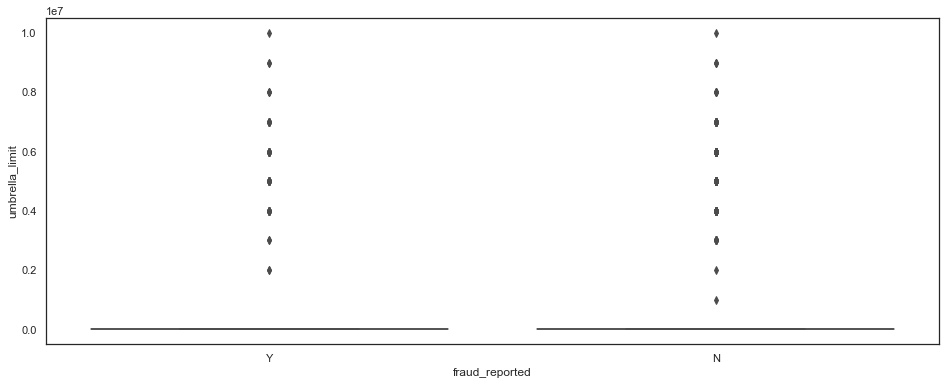

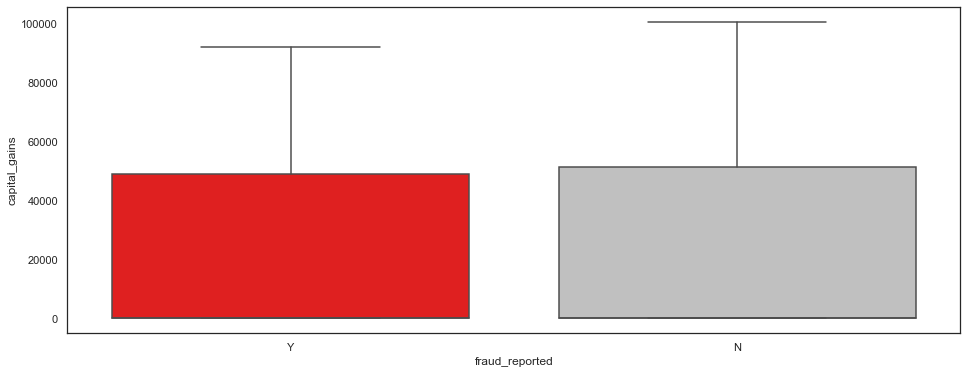

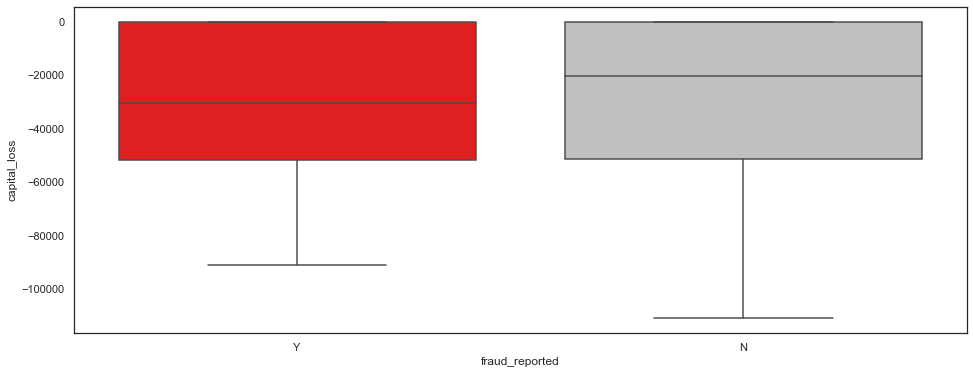

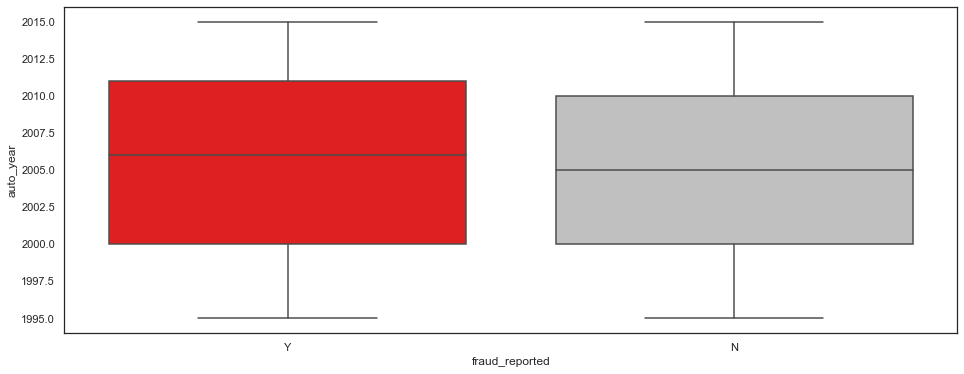

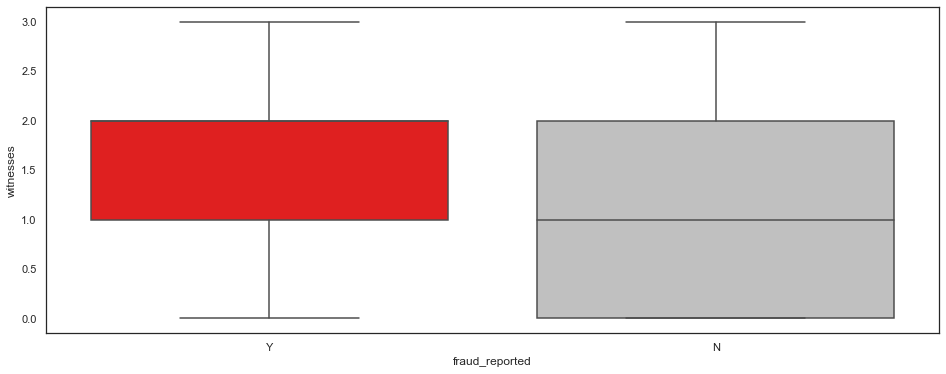

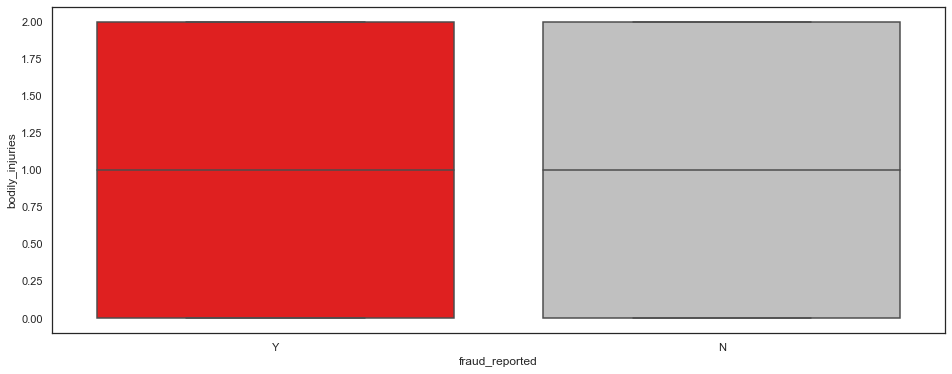

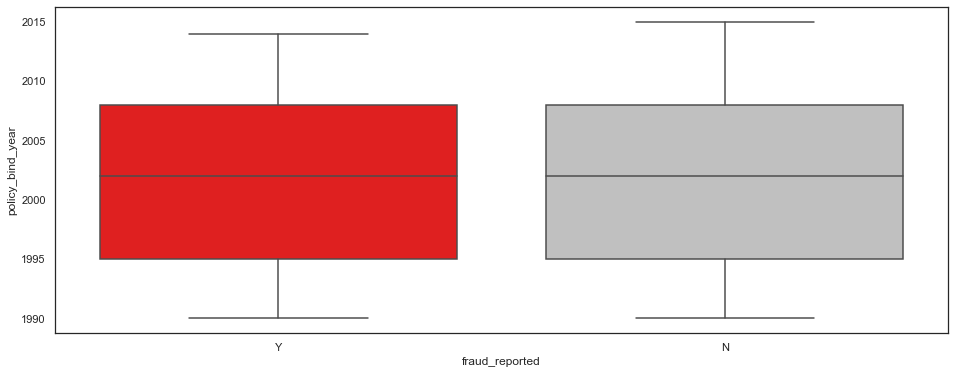

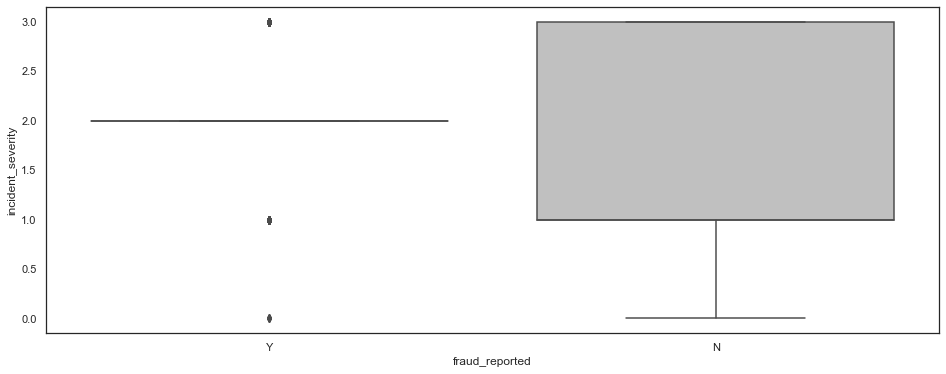

In [132]:
#each continous var and fraud reported's dist

for i, name in enumerate(df[cont_var]):
    plt.figure(i,figsize=(16,6))
    sns.boxplot(data=df, x="fraud_reported", y=name, palette=['red','silver'])
    

## Additional plots:

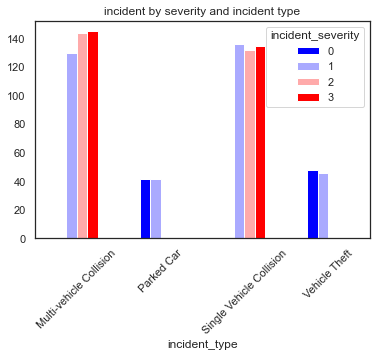

In [133]:
#cross tab of incident type and severity 
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(df['incident_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr',figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");

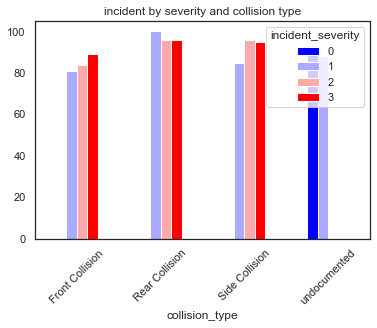

In [134]:
#undocumented collision types tend to be less severe

incident = pd.crosstab(df['collision_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type");

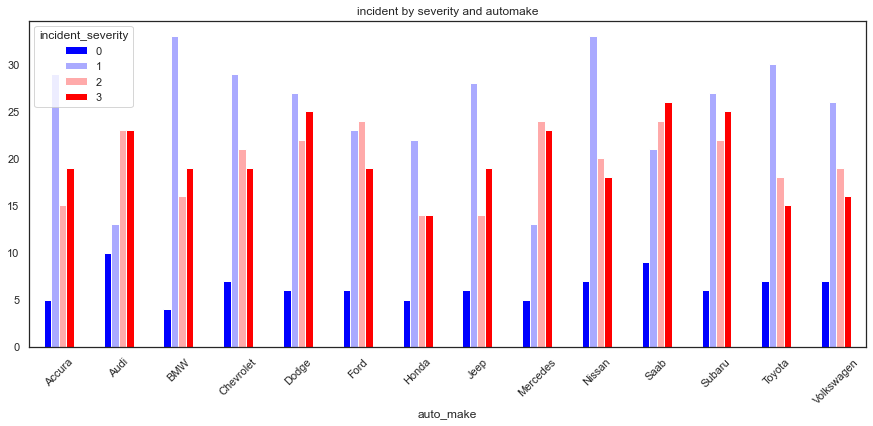

In [135]:
# seems like bmw and nissan gets a lot of minor accident
# fiercer cars like dodge, subaru, saab, merc get into mor severe accident

incident = pd.crosstab(df['auto_make'], df['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(15,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake");

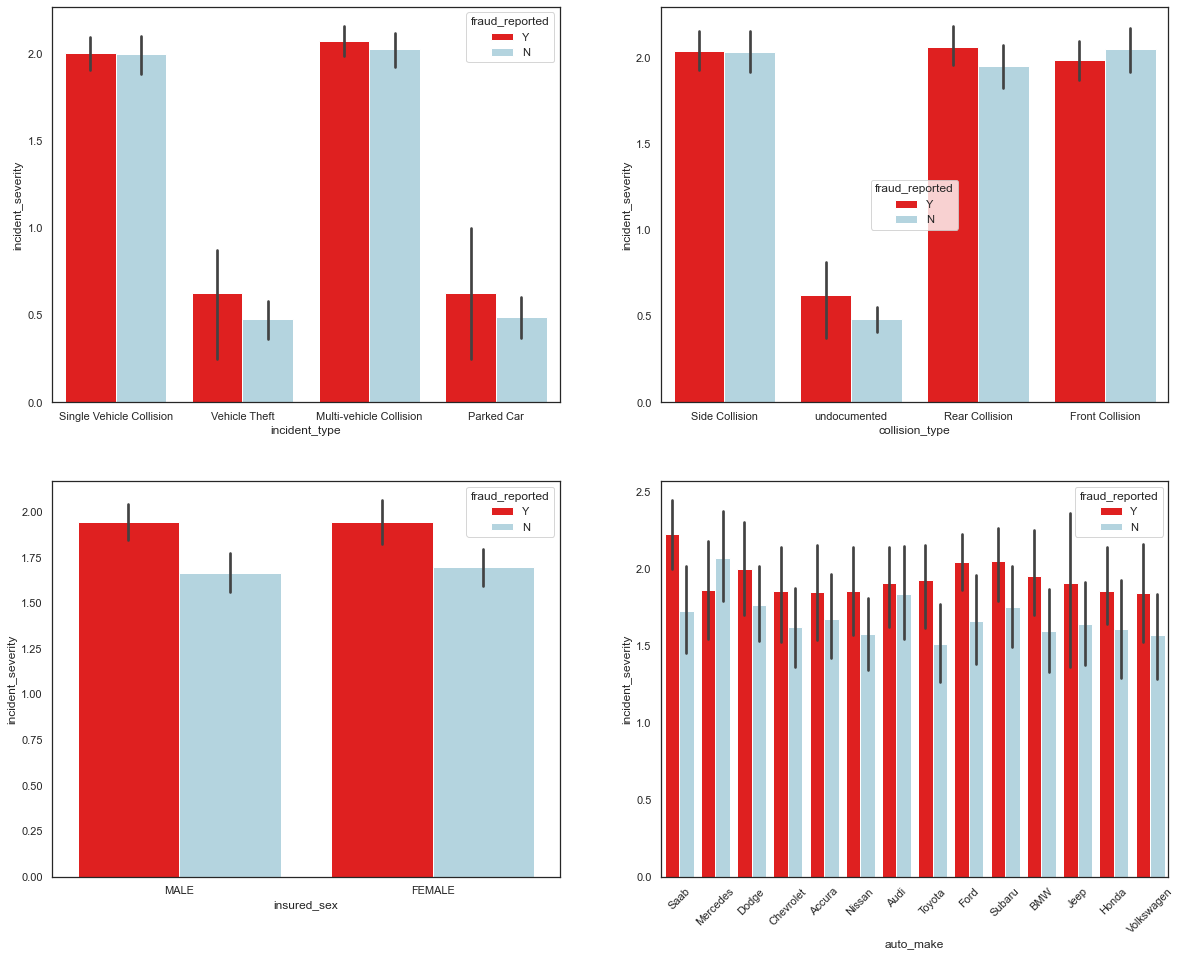

In [136]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_type", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="collision_type", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="insured_sex", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="auto_make", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[1][1]);

plt.xticks(rotation=45);

# although theft and parked car are less severe, they have more fraud cases.. maybe acrimony and vengeful?
# rear collision and undocumented have more fraud.. again we see a trend that less severe accidetns more fraud (undoc)
# no obvious trend by sex 
#saab subaru ford seem to have more fraud cases

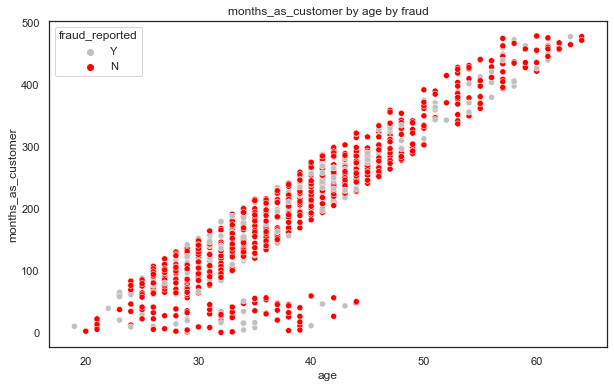

In [137]:
#try to see if there are any iteractions
#dont seem like it 
#a bunch of people across age are relatively new insurance  customers
#the rest are drivers that have insurance over the years.
#no clear pattern of interaction here

plt.figure(figsize=(10, 6))

sns.scatterplot(x="age", y="months_as_customer", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("months_as_customer by age by fraud");

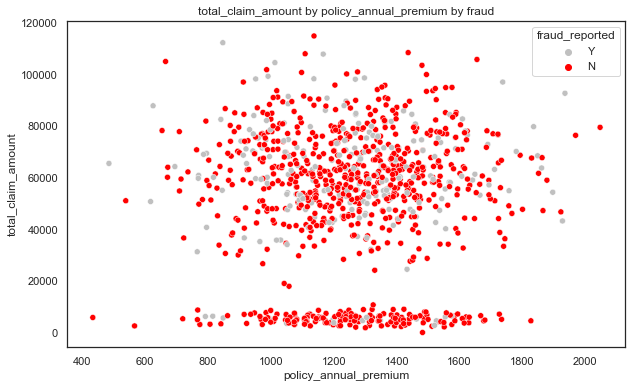

In [138]:
#no clear pattern but seems like claims close to 0 has most frauds

plt.figure(figsize=(10, 6))

sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("total_claim_amount by policy_annual_premium by fraud");

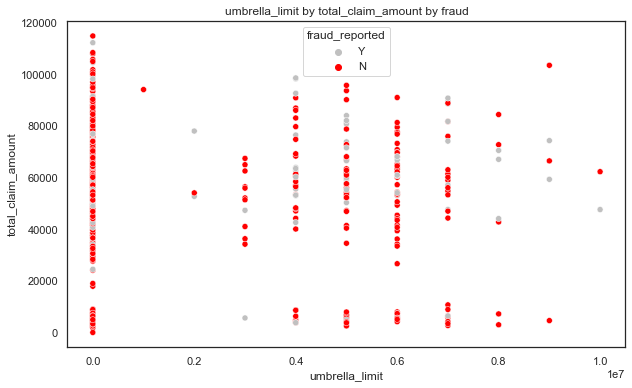

In [139]:
#seems like no umbrella limit more fraud?
#this people may have little to lose which is why they dont perchase umbrella 
#inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud?

plt.figure(figsize=(10, 6))

sns.scatterplot(x="umbrella_limit", y="total_claim_amount", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("umbrella_limit by total_claim_amount by fraud");

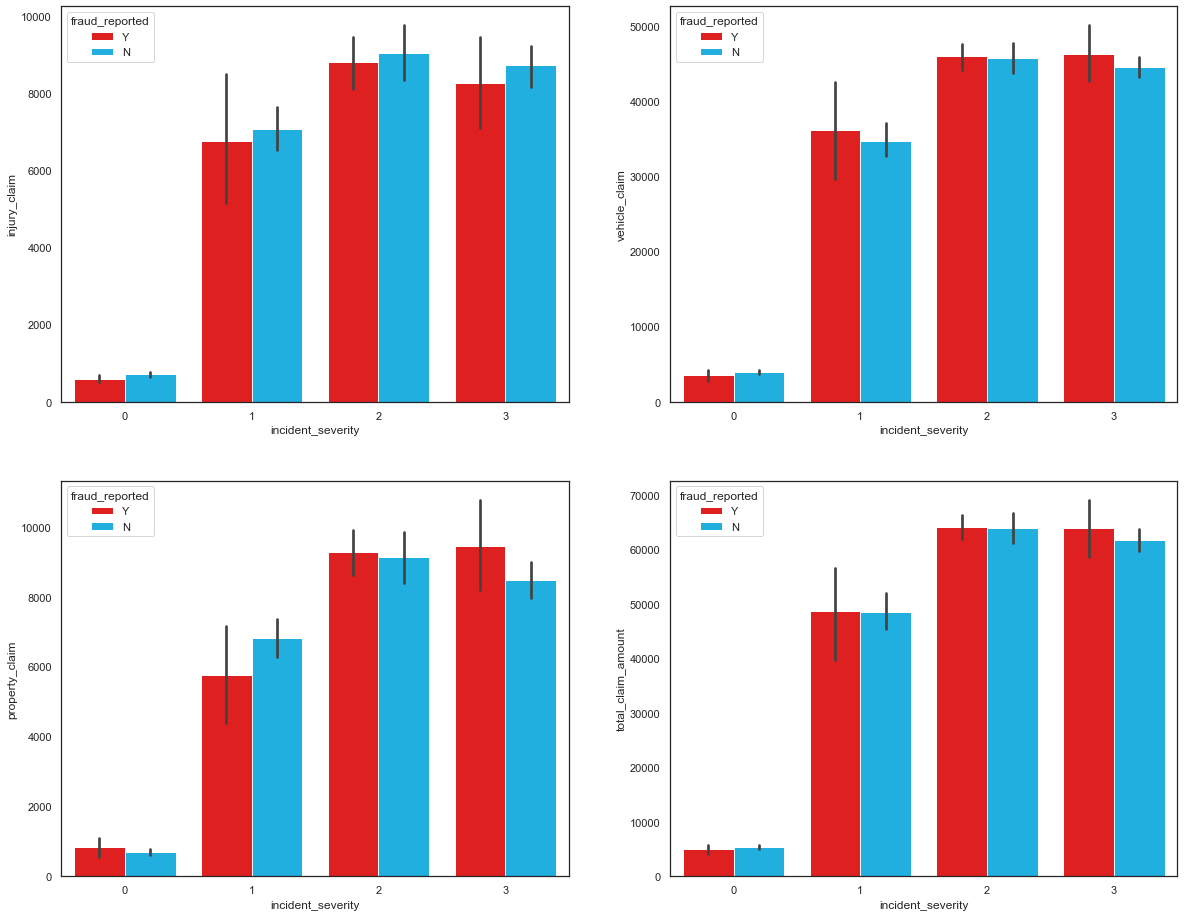

In [140]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_severity", y="injury_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="incident_severity", y="vehicle_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="incident_severity", y="property_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="incident_severity", y="total_claim_amount",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[1][1]);

# vehicle claims and property claims have more frauds than injury claims
# does someone act more honestly after injury??

### Losses by claims

Here, I define loss as simply money going out from the insurance company. Source of money coming in, on the other hand, are premiums. Although we know premiums and claims are not the only source of money going in or out of an insurance company, these 2 variables are used since they are the only information, we have from this data set. Typically, other source of money movement maybe investments made by the insurance company, for instance.

In [141]:
#create a variable that measure how much claims - how much premiums was paid by a client to indeicate a loss/profit

df['loss_by_claims'] = df['total_claim_amount'] - (df['policy_annual_premium'] * (2015 - df['policy_bind_year']))

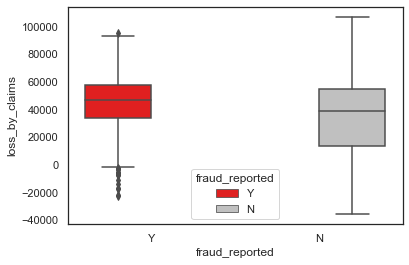

In [142]:
#note this is not how much the insurance company earns because there are a lot of other cars with no indicents 
sns.set_style("white") 

sns.boxplot(data=df, y="loss_by_claims", x="fraud_reported", hue='fraud_reported', palette=['red','silver']);

In [143]:
print(df['incident_severity'].value_counts())
print(df['insured_hobbies'].value_counts())
print(df['collision_type'].value_counts())
print(df['incident_state'].value_counts())


1    354
3    280
2    276
0     90
Name: incident_severity, dtype: int64
reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
Rear Collision     292
Side Collision     276
Front Collision    254
undocumented       178
Name: collision_type, dtype: int64
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


In [144]:
df[['capital_loss','capital_gains','loss_by_claims']]

,capital_loss,capital_gains,loss_by_claims
0,0,53300,70203.09
1,0,0,-5704.98
2,0,35100,13452.90
3,-62400,48900,28006.50
4,-46000,66000,4916.09
...,...,...,...
995,0,0,55740.80
996,0,70900,107043.21
997,0,35100,50898.12
998,0,0,41552.32


## Pre-processing:

In [145]:
#DV numerical code
df['fraud_reported'] = df['fraud_reported'].map({"Y":1, "N":0})
df['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [146]:
df['insured_sex'] = df['insured_sex'].map({"FEMALE":0,"MALE":1})

In [147]:
df['capital_loss']=df['capital_loss']*(-1)

In [148]:
df['capital_loss'].max()

111100

In [149]:
#check that they are coded

#df['pclaim_severity_int'] = df['property_claim']*df['incident_severity']
#df['vclaim_severity_int'] = np.sqrt(np.sqrt(df['vehicle_claim']))
#df['iclaim_severity_int'] = df['injury_claim']*df['incident_severity']
#df['tclaim_severity_int'] = df['total_claim_amount']*df['incident_severity']

#df['prem_claim_int'] = df['policy_annual_premium']*df['total_claim_amount']
#df['umlimit_tclaim_int'] = df['umbrella_limit']*df['total_claim_amount']


#### Dummy coding

In [150]:
rem = ['insured_sex','incident_month']
dum_list = [e for e in nom_var if e not in rem]
len(dum_list)

14

In [151]:
dum = pd.get_dummies(df[dum_list], drop_first=True)
dum.head()

,police_report_available_YES,police_report_available_undocumented,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Subaru,auto_make_Toyota,auto_make_Volkswagen,property_damage_YES,property_damage_undocumented,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,collision_type_Rear Collision,collision_type_Side Collision,collision_type_undocumented,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,policy_state_IN,policy_state_OH,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,policy_csl_250/500,policy_csl_500/1000,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [152]:
dum.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df_dummied = pd.concat([dum, df], axis=1)

In [153]:
df_dummied.drop(nom_var, axis=1, inplace=True)

In [154]:
df_dummied.head()

,police_report_available_YES,police_report_available_undocumented,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Subaru,auto_make_Toyota,auto_make_Volkswagen,property_damage_YES,property_damage_undocumented,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,collision_type_Rear Collision,collision_type_Side Collision,collision_type_undocumented,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,...,incident_state_WV,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,policy_csl_250/500,policy_csl_500/1000,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital_gains,capital_loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39,policy_bind_year,loss_by_claims
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,328,48,1000,1406.91,0,53300,0,2,5,1,1,2,71610,6510,13020,52080,2004,1,NaN,2014,70203.09
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,228,42,2000,1197.22,5000000,0,0,1,8,1,0,0,5070,780,780,3510,2007,1,NaN,2006,-5704.98
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,134,29,2000,1413.14,5000000,35100,0,1,7,3,2,3,34650,7700,3850,23100,2007,0,NaN,2000,13452.90
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,256,41,2000,1415.74,6000000,48900,62400,2,5,1,1,2,63400,6340,6340,50720,2014,1,NaN,1990,28006.50
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,228,44,1000,1583.91,6000000,66000,46000,1,20,1,0,1,6500,1300,650,4550,2009,0,NaN,2014,4916.09


In [155]:
df_dummied.isnull().sum().any()

True

## Train Test Split

In [156]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

## Partie PYCARET

In [158]:
from pycaret.datasets import get_data

### Dataset réduit

In [159]:
colo=['incident_severity','insured_hobbies','capital_loss','collision_type',
        'incident_state','policy_annual_premium','loss_by_claims','property_claim','fraud_reported']
df1 = []

for col in colo:
    df1.append(df[col])
    
df1 = pd.DataFrame(df1).T

In [160]:
dataset=df1

In [161]:
data = dataset.sample(frac=0.95, random_state=21)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (950, 9)
Unseen Data For Predictions: (50, 9)


In [162]:
from pycaret.classification import *

In [163]:
dataset.head()

,incident_severity,insured_hobbies,capital_loss,collision_type,incident_state,policy_annual_premium,loss_by_claims,property_claim,fraud_reported
0,2,sleeping,0,Side Collision,SC,1406.91,70203.1,13020,1
1,1,reading,0,undocumented,VA,1197.22,-5704.98,780,1
2,1,board-games,0,Rear Collision,NY,1413.14,13452.9,3850,0
3,2,board-games,62400,Front Collision,OH,1415.74,28006.5,6340,1
4,1,board-games,46000,undocumented,NY,1583.91,4916.09,650,0


In [164]:
data['fraud_reported'].value_counts()

0    711
1    239
Name: fraud_reported, dtype: int64

In [165]:
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks


In [166]:
#RUS=RandomUnderSampler()
#TL=TomekLinks()

In [167]:
classif1 = setup(data = data, target = 'fraud_reported',session_id=128, fold=10, fix_imbalance=True, normalize=True)

,Description,Value
0,session_id,128
1,Target,fraud_reported
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(950, 9)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [168]:
#classif1 = setup(data = data, target = 'fraud_reported', normalize=True,session_id=128, fold=10, fix_imbalance=True) 

In [169]:
data

,incident_severity,insured_hobbies,capital_loss,collision_type,incident_state,policy_annual_premium,loss_by_claims,property_claim,fraud_reported
0,2,camping,71700,Side Collision,NY,862.92,54810.4,11580,0
1,1,chess,0,Rear Collision,NC,1209.07,43130.2,6270,1
2,1,reading,0,Side Collision,WV,1215.36,39462.1,6620,0
3,1,reading,31900,undocumented,SC,1106.84,-14323.1,560,0
4,0,video-games,0,undocumented,WV,1008.79,-6696.69,550,0
...,...,...,...,...,...,...,...,...,...
945,1,camping,0,undocumented,NY,1251.65,-21953,280,0
946,3,golf,75000,Side Collision,NY,1556.31,80923.2,8630,0
947,2,cross-fit,0,Front Collision,SC,1518.46,50463.1,5350,0
948,3,dancing,68200,Front Collision,WV,1562.8,15008.4,4490,0


In [170]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8555,0.8864,0.8728,0.6683,0.7538,0.6553,0.6697,0.6060
catboost,CatBoost Classifier,0.8540,0.8895,0.8059,0.6781,0.7327,0.6339,0.6417,2.9170
ridge,Ridge Classifier,0.8524,0.0000,0.9029,0.6540,0.7557,0.6550,0.6751,0.0170
lda,Linear Discriminant Analysis,0.8524,0.8862,0.9029,0.6540,0.7557,0.6550,0.6751,0.0300
gbc,Gradient Boosting Classifier,0.8509,0.8885,0.7816,0.6853,0.7252,0.6245,0.6314,0.1290
et,Extra Trees Classifier,0.8464,0.8770,0.6985,0.7030,0.6969,0.5947,0.5976,0.1880
rf,Random Forest Classifier,0.8434,0.8808,0.7331,0.6772,0.6999,0.5949,0.5989,0.2060
ada,Ada Boost Classifier,0.8403,0.8688,0.7283,0.6730,0.6971,0.5895,0.5922,0.0820
lightgbm,Light Gradient Boosting Machine,0.8359,0.8770,0.6790,0.6749,0.6723,0.5635,0.5670,0.2080
svm,SVM - Linear Kernel,0.8344,0.0000,0.8673,0.6260,0.7229,0.6102,0.6311,0.0160


In [171]:
models()


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [172]:
tuned_catboost = tune_model(create_model('catboost'),optimize='F1',n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9104,0.9776,1.0000,0.7391,0.8500,0.7882,0.8065
1,0.8507,0.9176,0.9412,0.6400,0.7619,0.6589,0.6849
2,0.8060,0.8600,0.8824,0.5769,0.6977,0.5638,0.5915
3,0.8209,0.8588,0.9412,0.5926,0.7273,0.6039,0.6398
4,0.8939,0.9292,0.9412,0.7273,0.8205,0.7470,0.7595
5,0.9091,0.9112,0.9412,0.7619,0.8421,0.7793,0.7878
6,0.9091,0.9612,1.0000,0.7273,0.8421,0.7805,0.8000
7,0.8030,0.8650,0.7500,0.5714,0.6486,0.5153,0.5244
8,0.8636,0.8988,0.8125,0.6842,0.7429,0.6510,0.6554
9,0.7576,0.8375,0.9375,0.5000,0.6522,0.4913,0.5487


In [173]:
tuned_lr = tune_model(create_model('lr'),optimize='F1',n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8806,0.9624,0.8824,0.7143,0.7895,0.7074,0.7151
1,0.8657,0.8859,0.8824,0.6818,0.7692,0.6767,0.6879
2,0.8209,0.8353,0.7647,0.6190,0.6842,0.5611,0.5672
3,0.8060,0.8247,0.8824,0.5769,0.6977,0.5638,0.5915
4,0.8939,0.9304,0.8824,0.7500,0.8108,0.7378,0.7425
5,0.8939,0.9256,0.8824,0.7500,0.8108,0.7378,0.7425
6,0.9091,0.9562,0.8750,0.7778,0.8235,0.7626,0.7650
7,0.8333,0.8175,0.7500,0.6316,0.6857,0.5734,0.5774
8,0.8636,0.8612,0.7500,0.7059,0.7273,0.6365,0.6370
9,0.7727,0.8650,0.9375,0.5172,0.6667,0.5152,0.5677


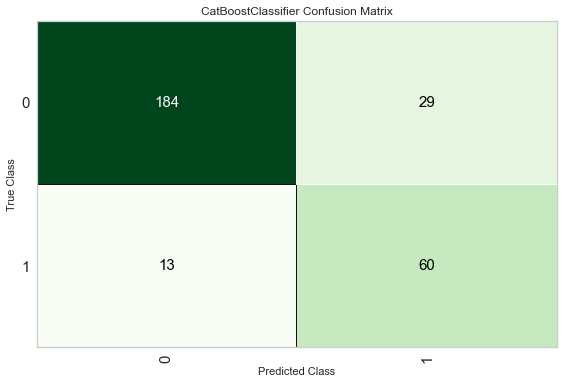

In [174]:
#trained model object is stored in the variable 'catboost'. 
plot_model(tuned_catboost, plot = 'confusion_matrix')
print(tuned_catboost)

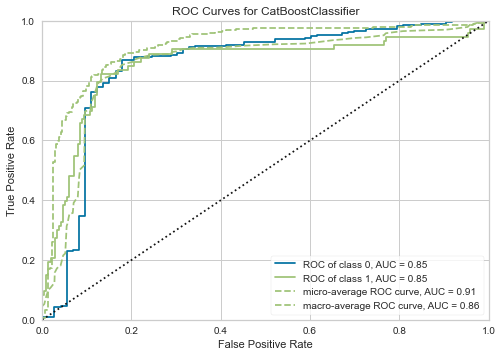

In [175]:
plot_model(tuned_catboost, plot = 'auc')

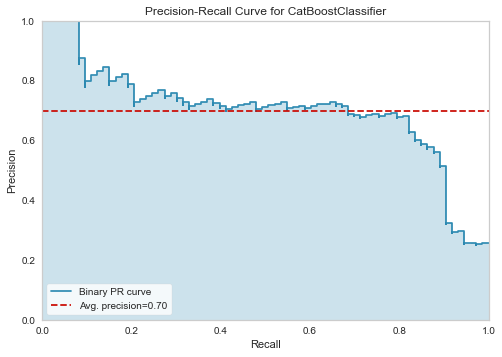

In [176]:
plot_model(tuned_catboost, plot = 'pr')

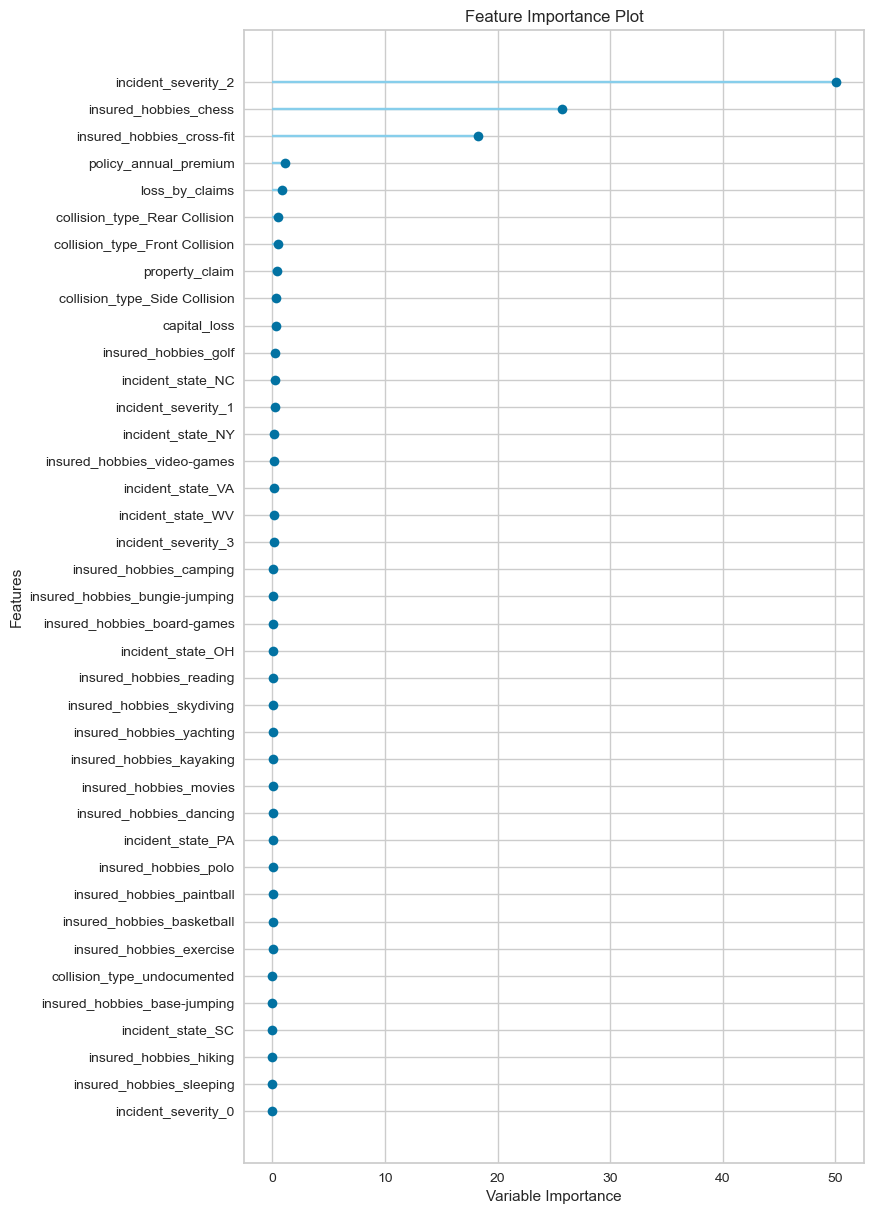

In [177]:
plot_model(tuned_catboost, plot = 'feature_all')

In [178]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [179]:
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8531,0.8522,0.8219,0.6742,0.7407,0.6397,0.6458


In [180]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8462,0.8520,0.7534,0.6790,0.7143,0.6094,0.6110


In [181]:
final_catboost = finalize_model(tuned_catboost)
unseen_predictions_catboost = predict_model(final_catboost, data=data_unseen)
unseen_predictions_catboost.head(10)

,incident_severity,insured_hobbies,capital_loss,collision_type,incident_state,policy_annual_premium,loss_by_claims,property_claim,fraud_reported,Label,Score
0,0,dancing,0,undocumented,NY,1123.87,-577.09,810,0,0,0.5117
1,1,bungie-jumping,0,Front Collision,NY,1326.62,67207.2,8180,0,0,0.5125
2,1,paintball,40600,Side Collision,NC,1340.43,22651,10160,0,0,0.5119
3,1,board-games,0,Side Collision,SC,1167.3,66965.4,13860,0,0,0.5121
4,2,skydiving,0,Front Collision,VA,1394.43,31734.7,6160,1,1,0.5067
5,2,sleeping,0,Front Collision,NY,1141.35,29790.3,5490,0,1,0.5076
6,0,board-games,0,undocumented,NY,1281.07,-4328.56,740,0,0,0.5117
7,2,golf,0,Side Collision,VA,1301.72,43362.2,7200,0,1,0.5064
8,2,paintball,68700,Rear Collision,OH,1219.04,66340.6,14500,0,1,0.5087
9,2,reading,10600,Side Collision,NY,1608.34,32459.8,12920,0,1,0.5091


In [182]:
from pycaret.utils import check_metric
check_metric(unseen_predictions_catboost['fraud_reported'], unseen_predictions_catboost['Label'], metric = 'F1')

0.7

In [183]:
#import pickle

#pickle.dump(tuned_catboost, open('modelCB.pkl','wb'))

#model = pickle.load(open('modelCB.pkl','rb'))
#model

In [184]:
#save_model(tuned_catboost, 'modelCB')

In [185]:
data

,incident_severity,insured_hobbies,capital_loss,collision_type,incident_state,policy_annual_premium,loss_by_claims,property_claim,fraud_reported
0,2,camping,71700,Side Collision,NY,862.92,54810.4,11580,0
1,1,chess,0,Rear Collision,NC,1209.07,43130.2,6270,1
2,1,reading,0,Side Collision,WV,1215.36,39462.1,6620,0
3,1,reading,31900,undocumented,SC,1106.84,-14323.1,560,0
4,0,video-games,0,undocumented,WV,1008.79,-6696.69,550,0
...,...,...,...,...,...,...,...,...,...
945,1,camping,0,undocumented,NY,1251.65,-21953,280,0
946,3,golf,75000,Side Collision,NY,1556.31,80923.2,8630,0
947,2,cross-fit,0,Front Collision,SC,1518.46,50463.1,5350,0
948,3,dancing,68200,Front Collision,WV,1562.8,15008.4,4490,0


In [186]:
# save transformation pipeline and model 
save_model(final_catboost, model_name ='modelCB')
#save_model(lr, model_name = 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='fraud_reported',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='fraud_reported')),
                 ('fix_perfect', Remove_100(target='fraud_reported')),
                 ('c

In [187]:
data

,incident_severity,insured_hobbies,capital_loss,collision_type,incident_state,policy_annual_premium,loss_by_claims,property_claim,fraud_reported
0,2,camping,71700,Side Collision,NY,862.92,54810.4,11580,0
1,1,chess,0,Rear Collision,NC,1209.07,43130.2,6270,1
2,1,reading,0,Side Collision,WV,1215.36,39462.1,6620,0
3,1,reading,31900,undocumented,SC,1106.84,-14323.1,560,0
4,0,video-games,0,undocumented,WV,1008.79,-6696.69,550,0
...,...,...,...,...,...,...,...,...,...
945,1,camping,0,undocumented,NY,1251.65,-21953,280,0
946,3,golf,75000,Side Collision,NY,1556.31,80923.2,8630,0
947,2,cross-fit,0,Front Collision,SC,1518.46,50463.1,5350,0
948,3,dancing,68200,Front Collision,WV,1562.8,15008.4,4490,0
